In [1]:
# ME17B158 - Omkar Nath

# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp, pi
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import seaborn as sns

In [3]:
# Reading & Normalizing the data
df = pd.read_csv("diabetes.csv")
X = np.array(df.drop(columns=['Outcome']))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
y = df['Outcome']

In [4]:
# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1.0/9, random_state=42)

In [5]:
# Trying different k
k_vals = list(range(1, 70, 2))
val_acc = []

for k in k_vals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    val_pred = classifier.predict(X_val)
    val_acc.append(accuracy_score(y_val, val_pred) * 100)

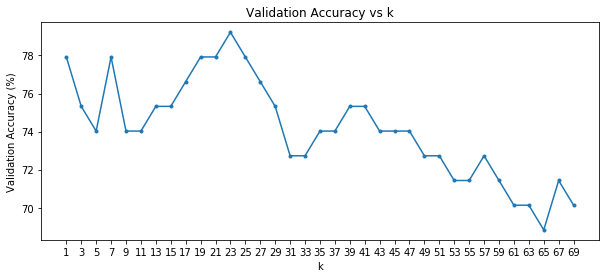

In [6]:
# Plotting k results
plt.figure(figsize=(10,4))
plt.plot(k_vals, val_acc, '.-')
plt.xticks(k_vals)
plt.title("Validation Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Validation Accuracy (%)")
plt.show()

In [7]:
# Finding the best k
best_k = k_vals[val_acc.index(max(val_acc))]
best_acc = max(val_acc)

print("Value of k that yields the best accuracy of ",best_acc," is ",best_k)

Value of k that yields the best accuracy of  79.22077922077922  is  23


In [8]:
# Training using the best value of k
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("Test accuracy = {}%".format(accuracy*100))

Test accuracy = 70.12987012987013%


Summarize your findings and results here:
* The best k value is k=23
* Test accuracy achieved = 70.12987012987013%

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



In [9]:
# Loading Data
X, y = load_digits(return_X_y=True)

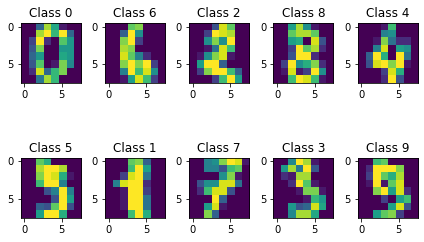

In [10]:
# Visualizing the Data

indices = []
search = 0

for i, val in enumerate(y):
    if val==search:
        indices.append(i)
        search += 1
    if search==10:
        break
        
fig, axs = plt.subplots(2, 5)
for i in range(len(indices)):
    axs[i%2][i%5].imshow(X[indices[i]].reshape(8, 8))
    axs[i%2][i%5].set_title(("Class "+ str(indices[i])))
    
plt.tight_layout()
plt.show()

In [11]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 158, test_size=0.2)

In [12]:
# Gaussian Classifier
gauss_classifier = GaussianNB()
gauss_classifier.fit(X_train, y_train)

gauss_train_pred = gauss_classifier.predict(X_train)
gauss_test_pred = gauss_classifier.predict(X_test)

gauss_train_acc = accuracy_score(y_train, gauss_train_pred)
gauss_test_acc = accuracy_score(y_test, gauss_test_pred)

gauss_train_f1 = f1_score(y_train, gauss_train_pred, average='weighted')
gauss_test_f1 = f1_score(y_test, gauss_test_pred, average='weighted')

In [13]:
# Gaussian Performance
print("Gaussian Training Accuracy: ",(gauss_train_acc*100),"%")
print("Gaussian Test Accuracy: ",(gauss_test_acc*100),"%")
print("Gaussian Training F1 Score: ",gauss_train_f1)
print("Gaussian Test F1 Score: ",gauss_test_f1)

Gaussian Training Accuracy:  86.77800974251913 %
Gaussian Test Accuracy:  85.83333333333333 %
Gaussian Training F1 Score:  0.8704531810055136
Gaussian Test F1 Score:  0.8594556463271799


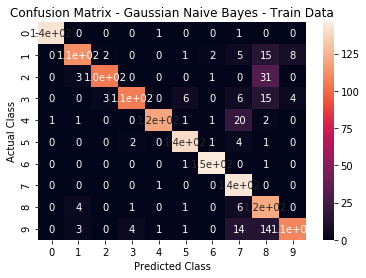

In [14]:
# Gaussian Confusion Matrix
gauss_conf_train = confusion_matrix(y_train, gauss_train_pred)

ax = sns.heatmap(gauss_conf_train, annot=gauss_conf_train)
ax.set_title("Confusion Matrix - Gaussian Naive Bayes - Train Data")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
plt.show()

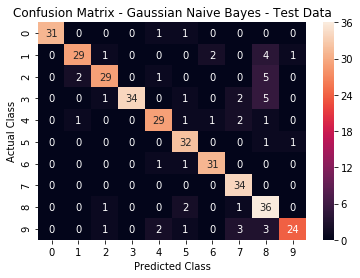

In [15]:
# Gaussian Confusion Matrix
gauss_conf_test = confusion_matrix(y_test, gauss_test_pred)

ax = sns.heatmap(gauss_conf_test, annot=gauss_conf_test)
ax.set_title("Confusion Matrix - Gaussian Naive Bayes - Test Data")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
plt.show()

In [16]:
# Bernoulli Classifier
bernoulli_classifier = BernoulliNB()
bernoulli_classifier.fit(X_train, y_train)

bernoulli_train_pred = bernoulli_classifier.predict(X_train)
bernoulli_test_pred = bernoulli_classifier.predict(X_test)

bernoulli_train_acc = accuracy_score(y_train, bernoulli_train_pred)
bernoulli_test_acc = accuracy_score(y_test, bernoulli_test_pred)

bernoulli_train_f1 = f1_score(y_train, bernoulli_train_pred, average='weighted')
bernoulli_test_f1 = f1_score(y_test, bernoulli_test_pred, average='weighted')

In [17]:
# Bernoulli Performance
print("Bernoulli Training Accuracy: ",(bernoulli_train_acc*100),"%")
print("Bernoulli Test Accuracy: ",(bernoulli_test_acc*100),"%")
print("Bernoulli Training F1 Score: ",bernoulli_train_f1)
print("Bernoulli Test F1 Score: ",bernoulli_test_f1)

Bernoulli Training Accuracy:  87.33472512178149 %
Bernoulli Test Accuracy:  82.22222222222221 %
Bernoulli Training F1 Score:  0.8730479044505931
Bernoulli Test F1 Score:  0.818531777926151


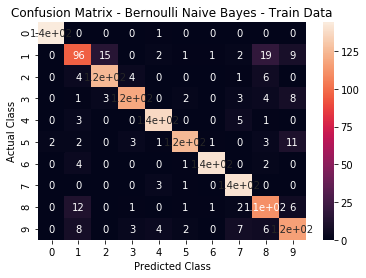

In [18]:
# Bernoulli Confusion Matrix
bernoulli_conf_train = confusion_matrix(y_train, bernoulli_train_pred)

ax = sns.heatmap(bernoulli_conf_train, annot=bernoulli_conf_train)
ax.set_title("Confusion Matrix - Bernoulli Naive Bayes - Train Data")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
plt.show()

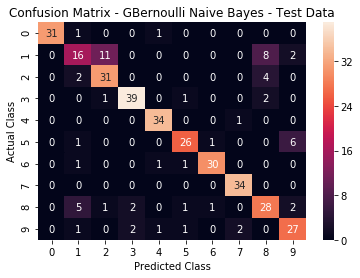

In [19]:
# Bernoulli Confusion Matrix
bernoulli_conf_test = confusion_matrix(y_test, bernoulli_test_pred)

ax = sns.heatmap(bernoulli_conf_test, annot=bernoulli_conf_test)
ax.set_title("Confusion Matrix - GBernoulli Naive Bayes - Test Data")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
plt.show()

Summarize your findings and results here:

**Results for Gaussian:**
* Gaussian Training Accuracy:  86.77800974251913 %
* Gaussian Test Accuracy:  85.83333333333333 %
* Gaussian Training F1 Score:  0.8704531810055136
* Gaussian Test F1 Score:  0.8594556463271799

**Results for Bernoullli:**
* Bernoulli Training Accuracy:  87.33472512178149 %
* Bernoulli Test Accuracy:  82.22222222222221 %
* Bernoulli Training F1 Score:  0.8730479044505931
* Bernoulli Test F1 Score:  0.818531777926151

It is seen that the results using Bernoulli's Classifier are slightly better.